In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Het dataframe waarmee we werken is die waarin de chemicalien in 4 kolommen gerangschikt zijn, en naar locatie en (meet)datum gegroepeerd

In [2]:
df=pd.read_csv('RWS_data_gefilterd_4params_pivot.csv')

In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df.head()

locatie       datum  chlorofyl-a  nitriet  nitraat  orthofosfaat
0   ALMLO  2010-01-18          3.0     0.02     1.69         0.018
1   ALMLO  2010-02-15          3.0     0.01     2.13         0.022
2   ALMLO  2010-03-15          3.0     0.03     1.97         0.043
3   ALMLO  2010-04-12          6.0     0.04     2.00         0.120
4   ALMLO  2010-05-10          3.0     0.04     1.69         0.220

### De eerste vraag die we willen beantwoorden is: 

# is er een verband tusse chlorofyl-a, en de andere 3 chemicalien?

### Om vragen rond "het verband tussen" te beantwoorden, maken we gebruik van de Pearson's correlatiecoefficient r. Deze heeft een waarde tussen -1 en +1 en moet als volgt geinterpreteerd worden:

### -0,1< r < 0,1 : geen correlatie
### -0,3< r <-0,1 of 0,1< r < 0,3 : zwakke correlatie
### -0,5< r <-0,3 of 0,3< r < 0,5 : matige correlatie
### r< -0,5 of r> 0,5 : sterke correlatie

### Om te bepalen of er een correlatie in het algemeen is, berekenen van eerst de corr. coefficienten, waarbij we alle metingen die we hebben meenemen.

In [5]:
print(df['chlorofyl-a'].corr(df['nitriet']))
print(df['chlorofyl-a'].corr(df['nitraat']))
print(df['chlorofyl-a'].corr(df['orthofosfaat']))

-0.03911386264610731
-0.05464222422551377
-0.07947987598832537


## We kunnen dus concluderen dat in het algemeen voor geen van de drie chemicalien een verband is met de concentratie chlorofyl-a
### Vervolgens gaan we  nu onderzoeken of dat per locatie misschien anders is. Hiervoor gaan we de corr. coeff. per locatie berekenen.

In [6]:
df_ccloc=pd.DataFrame(df.locatie.unique())

In [7]:
len(df_ccloc)

101

In [8]:
ccs=pd.DataFrame(np.zeros((101,3)))

In [9]:
for i in range(101):
    a=df.loc[df.locatie==df_ccloc.iloc[i,0],'chlorofyl-a']
    b=df.loc[df.locatie==df_ccloc.iloc[i,0],'nitriet']
    c=df.loc[df.locatie==df_ccloc.iloc[i,0],'nitraat']
    d=df.loc[df.locatie==df_ccloc.iloc[i,0],'orthofosfaat']
    ccs.iloc[i,0]=a.corr(b)
    ccs.iloc[i,1]=a.corr(c)
    ccs.iloc[i,2]=a.corr(d)

In [10]:
ccs.tail()

0         1         2
96  -0.146010 -0.495659  0.260075
97  -0.465465 -0.453076 -0.372205
98  -0.348378 -0.392049 -0.319716
99  -0.448478 -0.416831 -0.068740
100 -0.366224 -0.196353  0.114250

In [11]:
ccsR=ccs.rename(columns={0:'nitriet', 1:'nitraat', 2:'orthofosfaat'})
cc_algemeen=pd.concat([df_ccloc,ccsR],axis=1)
cc_algemeen=cc_algemeen.rename(columns={0:'locatie'})

In [12]:
cc_algemeen.head()

locatie   nitriet   nitraat  orthofosfaat
0      ALMLO  0.089718 -0.291335     -0.034511
1   AMRKHVN2  0.046941 -0.182845     -0.427285
2      AMSDM -0.146495 -0.288894     -0.408645
3       ANDK -0.426718 -0.626557     -0.424706
4  BEERKNMDN -0.356024 -0.086742     -0.582070

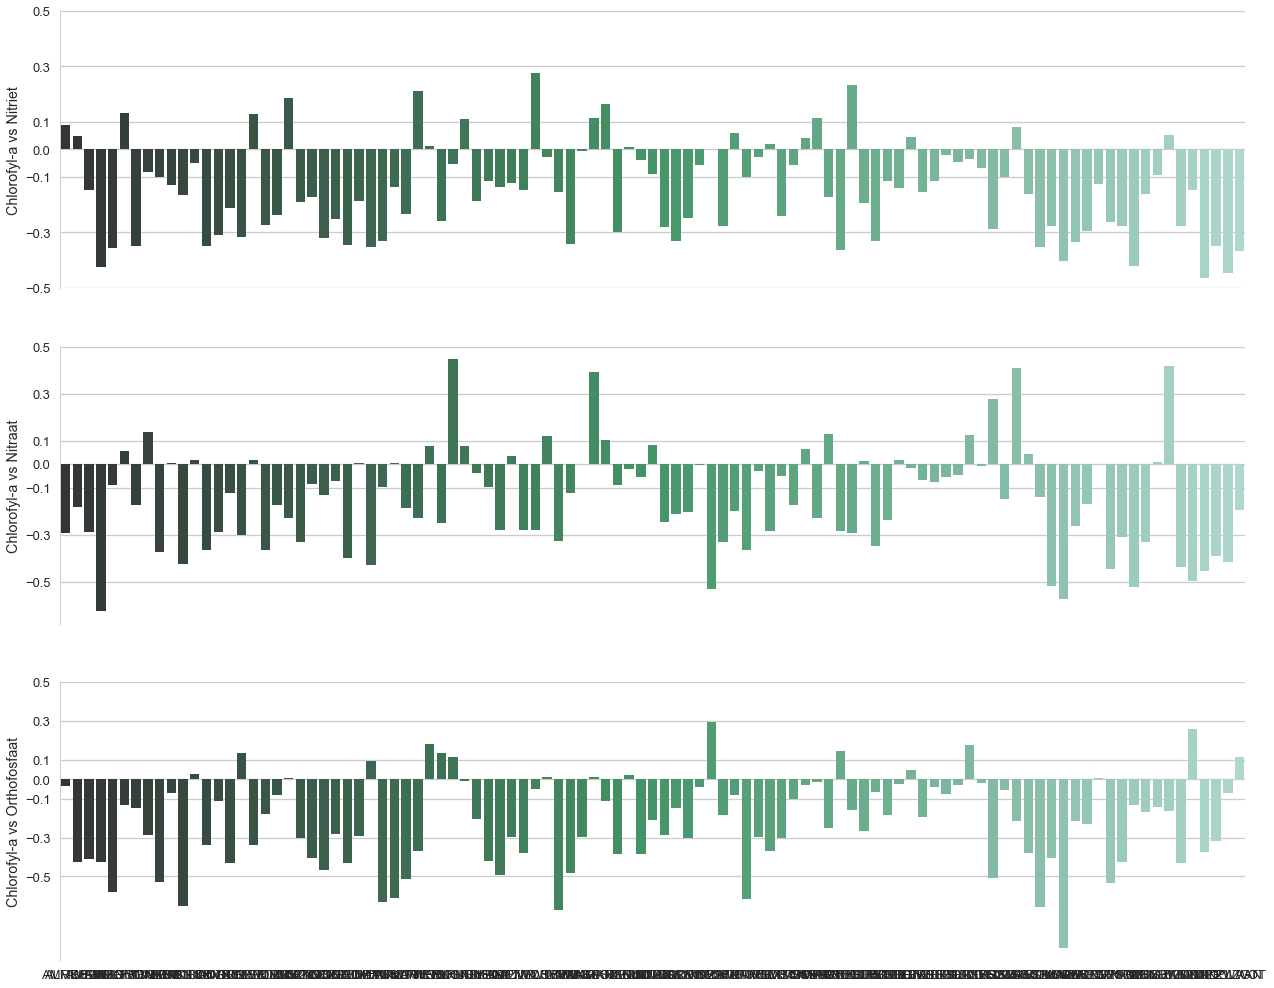

In [13]:
sns.set(style="whitegrid", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 14), sharex=True)

# Generate some sequential data
x = cc_algemeen.locatie.unique()
y1 = cc_algemeen.nitriet
sns.barplot(x, y1, palette="BuGn_d", ax=ax1)
ax1.set_ylabel("Chlorofyl-a vs Nitriet")

y2 = cc_algemeen.nitraat
sns.barplot(x, y2, palette="BuGn_d", ax=ax2)
ax2.set_ylabel("Chlorofyl-a vs Nitraat")

y3 = cc_algemeen.orthofosfaat
sns.barplot(x, y3, palette="BuGn_d", ax=ax3)
ax3.set_ylabel("Chlorofyl-a vs Orthofosfaat")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[-0.5,-0.3,-0.1,0,0.1,0.3,0.5])
plt.tight_layout(h_pad=3)

## Zoals we in deze grafieken kunnen zien is er geen enkele locatie waar de concentratie nitriet sterk gecorreleerd is met die van chlorofyl-a, 5 locaties waar dat met nitraat het geval is, en 12 waar dat met fosfaat het geval is. Die correlaties zijn zonder uitzondering negatief (dwz. hoe meer nitraat/fosfaat, hoe minder chlorofyl-a)
### Omdat de plaatsnamen in de grafiek niet leesbaar zijn, heb ik hier apart nog twee tabelletjes voor gemaakt.

In [76]:
nitraat_pieken=cc_algemeen.loc[cc_algemeen['nitraat']<-0.5,['locatie','nitraat']]
fosfaat_pieken=cc_algemeen.loc[cc_algemeen['orthofosfaat']<-0.5,['locatie','orthofosfaat']]
nitraat_pieken.to_csv('pieken_nitraat_boven_05_zonder_tijdsaspect.csv')
fosfaat_pieken.to_csv('pieken_fosfaat_boven_05_zonder-tijdsaspect.csv')
print(nitraat_pieken)
print()
print(fosfaat_pieken)

    locatie   nitraat
3      ANDK -0.626557
55   NULDHK -0.529970
84  VROUWZD -0.516361
85     VURN -0.574934
91   WIELGN -0.524190

         locatie  orthofosfaat
4      BEERKNMDN     -0.582070
8          BOVSS     -0.526644
10       BRIENOD     -0.651158
27        HAMMOT     -0.632163
28       HANSWGL     -0.610358
29     HARLGVHVN     -0.512780
42        LOBPTN     -0.671628
58        PUTTHK     -0.618164
79       TERSLG4     -0.506639
83  VLISSGBISSVH     -0.657973
85          VURN     -0.870846
89      WESTHVN2     -0.534484


### Tenslotte willen we kijken of de correlaties versterken als we de meetgegevens niet alleen naar locatie, maar ook per seizoen (3 maanden) verdelen. Immers: de omgevingstemperatuur zou een rol kunnen spelen.

### Om te beginnen voegen we een kolom met het maandnummer toe

In [15]:
maandnummer=pd.DataFrame(np.array(pd.DatetimeIndex(df['datum']).month),columns=list('m'))
maandnummer=maandnummer.rename(columns={'m':'maandnummer'})
df=pd.concat([df,maandnummer],axis=1)

In [16]:
df.head()

locatie       datum  chlorofyl-a  nitriet  nitraat  orthofosfaat  \
0   ALMLO  2010-01-18          3.0     0.02     1.69         0.018   
1   ALMLO  2010-02-15          3.0     0.01     2.13         0.022   
2   ALMLO  2010-03-15          3.0     0.03     1.97         0.043   
3   ALMLO  2010-04-12          6.0     0.04     2.00         0.120   
4   ALMLO  2010-05-10          3.0     0.04     1.69         0.220   

   maandnummer  
0            1  
1            2  
2            3  
3            4  
4            5

### Nu gaan we de correlatiecoefficienten per seizoen berekenen

In [17]:
ccs_nitriet=pd.DataFrame(np.zeros((101,4)))
ccs_nitraat=pd.DataFrame(np.zeros((101,4)))
ccs_fosfaat=pd.DataFrame(np.zeros((101,4)))
for i in range(101):
    for j in range(4):
        aa=df.loc[df.locatie==df_ccloc.iloc[i,0],['chlorofyl-a','maandnummer']]
        bb=df.loc[df.locatie==df_ccloc.iloc[i,0],['nitriet','maandnummer']]
        cc=df.loc[df.locatie==df_ccloc.iloc[i,0],['nitraat','maandnummer']]
        dd=df.loc[df.locatie==df_ccloc.iloc[i,0],['orthofosfaat','maandnummer']]
        if j==0:
            a=aa.loc[(df.maandnummer==12)|(df.maandnummer==1)|(df.maandnummer==2),'chlorofyl-a']
            b=bb.loc[(df.maandnummer==12)|(df.maandnummer==1)|(df.maandnummer==2),'nitriet']
            c=cc.loc[(df.maandnummer==12)|(df.maandnummer==1)|(df.maandnummer==2),'nitraat']
            d=dd.loc[(df.maandnummer==12)|(df.maandnummer==1)|(df.maandnummer==2),'orthofosfaat']
        else:
            a=aa.loc[(df.maandnummer==3*j)|(df.maandnummer==3*j+1)|(df.maandnummer==3*j+2),'chlorofyl-a']
            b=bb.loc[(df.maandnummer==3*j)|(df.maandnummer==3*j+1)|(df.maandnummer==3*j+2),'nitriet']
            c=cc.loc[(df.maandnummer==3*j)|(df.maandnummer==3*j+1)|(df.maandnummer==3*j+2),'nitraat']
            d=dd.loc[(df.maandnummer==3*j)|(df.maandnummer==3*j+1)|(df.maandnummer==3*j+2),'orthofosfaat']
        ccs_nitriet.iloc[i,j]=a.corr(b)
        ccs_nitraat.iloc[i,j]=a.corr(c)
        ccs_fosfaat.iloc[i,j]=a.corr(d)

D:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [18]:
ccsR=ccs_nitriet.rename(columns={0:'Dec-Jan-Feb', 1:'Mar-Apr-May', 2:'Jun-Jul-Aug', 3:'Sep-Oct-Nov'})
seizoenen_nitriet=pd.concat([df_ccloc,ccsR],axis=1)
seizoenen_nitriet=seizoenen_nitriet.rename(columns={0:'locatie'})

ccsR=ccs_nitraat.rename(columns={0:'Dec-Jan-Feb', 1:'Mar-Apr-May', 2:'Jun-Jul-Aug', 3:'Sep-Oct-Nov'})
seizoenen_nitraat=pd.concat([df_ccloc,ccsR],axis=1)
seizoenen_nitraat=seizoenen_nitraat.rename(columns={0:'locatie'})

ccsR=ccs_fosfaat.rename(columns={0:'Dec-Jan-Feb', 1:'Mar-Apr-May', 2:'Jun-Jul-Aug', 3:'Sep-Oct-Nov'})
seizoenen_fosfaat=pd.concat([df_ccloc,ccsR],axis=1)
seizoenen_fosfaat=seizoenen_fosfaat.rename(columns={0:'locatie'})

In [19]:
seizoenen_fosfaat.head()

locatie  Dec-Jan-Feb  Mar-Apr-May  Jun-Jul-Aug  Sep-Oct-Nov
0      ALMLO    -0.353489    -0.203418     0.139668    -0.330346
1   AMRKHVN2    -0.637728    -0.274369    -0.365851    -0.823865
2      AMSDM    -0.101153    -0.371889    -0.409138    -0.071010
3       ANDK    -0.348287    -0.324150    -0.615451    -0.418068
4  BEERKNMDN          NaN    -0.646311    -0.685191    -0.240850

## Tenslotte maken we per stof een geannoteerde heatmap

### Eerst vervang ik alle NaN's door een 0 ("0" betekent "niet gecorrreleerd", dus eigenlijk is dat hetzelfde)

In [20]:
seizoenen_nitriet=seizoenen_nitriet.fillna(0)
seizoenen_nitraat=seizoenen_nitraat.fillna(0)
seizoenen_fosfaat=seizoenen_fosfaat.fillna(0)

In [77]:
sni=seizoenen_nitriet
sna=seizoenen_nitraat
sfo=seizoenen_fosfaat
thresh=0.75
#psni=sni.loc[(sni['Dec-Jan-Feb']<-0.5)|(sni['Dec-Jan-Feb']>0.5),:]
psni=sni.loc[(sni['Dec-Jan-Feb']<-thresh)|(sni['Dec-Jan-Feb']>thresh)|(sni['Mar-Apr-May']<-thresh)|(sni['Mar-Apr-May']>thresh)|(sni['Jun-Jul-Aug']<-thresh)|(sni['Jun-Jul-Aug']>thresh)|(sni['Sep-Oct-Nov']<-thresh)|(sni['Sep-Oct-Nov']>thresh),:]
psna=sna.loc[(sna['Dec-Jan-Feb']<-thresh)|(sna['Dec-Jan-Feb']>thresh)|(sna['Mar-Apr-May']<-thresh)|(sna['Mar-Apr-May']>thresh)|(sna['Jun-Jul-Aug']<-thresh)|(sna['Jun-Jul-Aug']>thresh)|(sna['Sep-Oct-Nov']<-thresh)|(sna['Sep-Oct-Nov']>thresh),:]
psfo=sfo.loc[(sfo['Dec-Jan-Feb']<-thresh)|(sfo['Dec-Jan-Feb']>thresh)|(sfo['Mar-Apr-May']<-thresh)|(sfo['Mar-Apr-May']>thresh)|(sfo['Jun-Jul-Aug']<-thresh)|(sfo['Jun-Jul-Aug']>thresh)|(sfo['Sep-Oct-Nov']<-thresh)|(sfo['Sep-Oct-Nov']>thresh),:]

In [78]:
print(len(psni))
print(len(psna))
print(len(psfo))

11
14
15


In [79]:
psni.to_csv('pieken_nitriet_boven_075_met_seizoenen.csv')
psna.to_csv('pieken_nitraat_boven_075_met_seizoenen.csv')
psfo.to_csv('pieken_fosfaat_boven_075_met_seizoenen.csv')

In [80]:
thresh=0.9999999999999999
#psni=sni.loc[(sni['Dec-Jan-Feb']<-0.5)|(sni['Dec-Jan-Feb']>0.5),:]
psni=sni.loc[(sni['Dec-Jan-Feb']<-thresh)|(sni['Dec-Jan-Feb']>thresh)|(sni['Mar-Apr-May']<-thresh)|(sni['Mar-Apr-May']>thresh)|(sni['Jun-Jul-Aug']<-thresh)|(sni['Jun-Jul-Aug']>thresh)|(sni['Sep-Oct-Nov']<-thresh)|(sni['Sep-Oct-Nov']>thresh),:]
psna=sna.loc[(sna['Dec-Jan-Feb']<-thresh)|(sna['Dec-Jan-Feb']>thresh)|(sna['Mar-Apr-May']<-thresh)|(sna['Mar-Apr-May']>thresh)|(sna['Jun-Jul-Aug']<-thresh)|(sna['Jun-Jul-Aug']>thresh)|(sna['Sep-Oct-Nov']<-thresh)|(sna['Sep-Oct-Nov']>thresh),:]
psfo=sfo.loc[(sfo['Dec-Jan-Feb']<-thresh)|(sfo['Dec-Jan-Feb']>thresh)|(sfo['Mar-Apr-May']<-thresh)|(sfo['Mar-Apr-May']>thresh)|(sfo['Jun-Jul-Aug']<-thresh)|(sfo['Jun-Jul-Aug']>thresh)|(sfo['Sep-Oct-Nov']<-thresh)|(sfo['Sep-Oct-Nov']>thresh),:]

In [81]:
print(len(psni))
print(len(psna))
print(len(psfo))

2
4
5


In [82]:
psni.to_csv('pieken_nitriet_boven_09999999999999999.csv')
psna.to_csv('pieken_nitraat_boven_09999999999999999.csv')
psfo.to_csv('pieken_fosfaat_boven_09999999999999999.csv')

In [21]:
seizoenen_fosfaat.head()

locatie  Dec-Jan-Feb  Mar-Apr-May  Jun-Jul-Aug  Sep-Oct-Nov
0      ALMLO    -0.353489    -0.203418     0.139668    -0.330346
1   AMRKHVN2    -0.637728    -0.274369    -0.365851    -0.823865
2      AMSDM    -0.101153    -0.371889    -0.409138    -0.071010
3       ANDK    -0.348287    -0.324150    -0.615451    -0.418068
4  BEERKNMDN     0.000000    -0.646311    -0.685191    -0.240850

In [22]:
seizoenen_nitriet.set_index('locatie', inplace=True)
seizoenen_nitraat.set_index('locatie', inplace=True)
seizoenen_fosfaat.set_index('locatie', inplace=True)

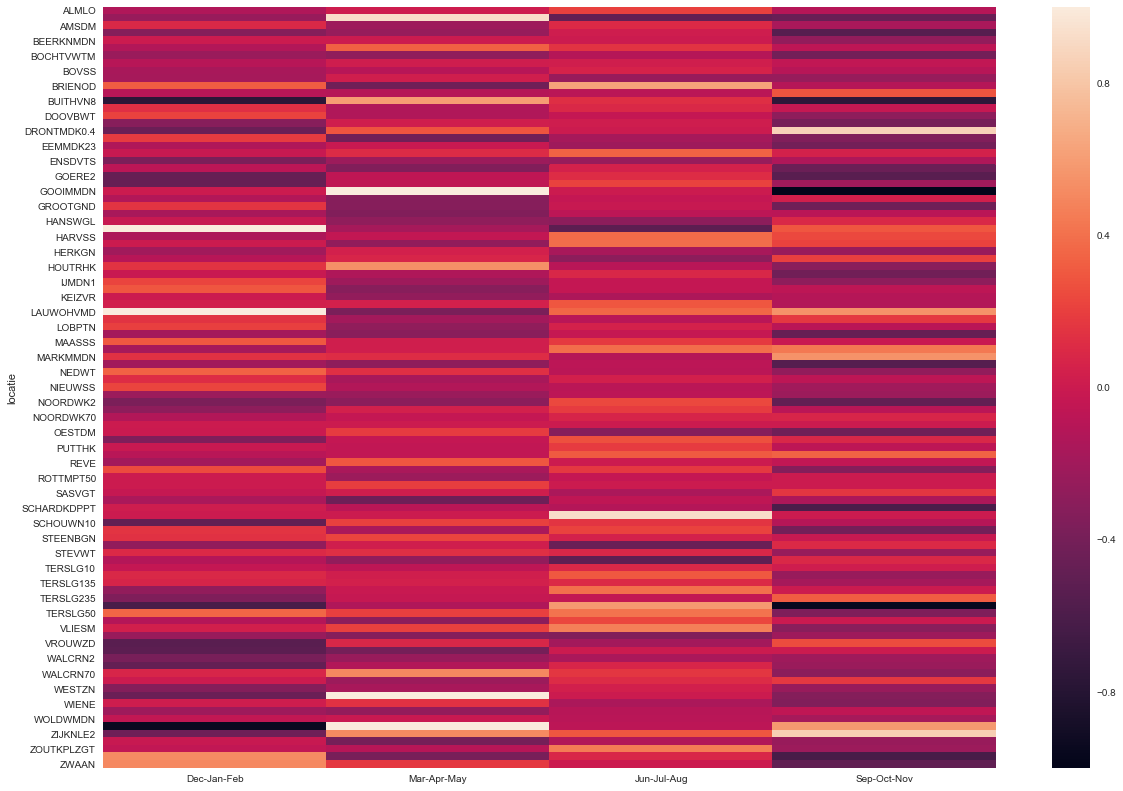

In [23]:
sns.set()

f, ax = plt.subplots(figsize=(20, 14))
sns.heatmap(seizoenen_nitriet, annot=False, fmt="f", linewidths=0, ax=ax)

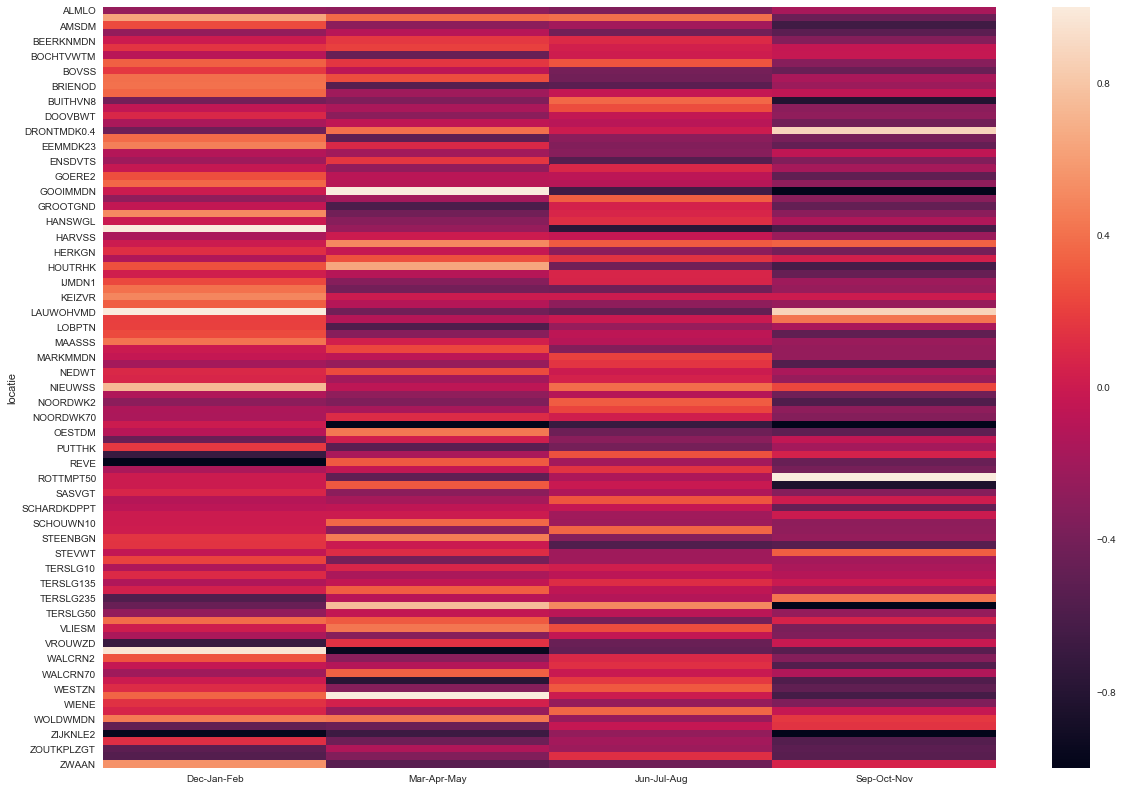

In [24]:
sns.set()

f, ax = plt.subplots(figsize=(20, 14))
sns.heatmap(seizoenen_nitraat, annot=False, fmt="f", linewidths=0, ax=ax)

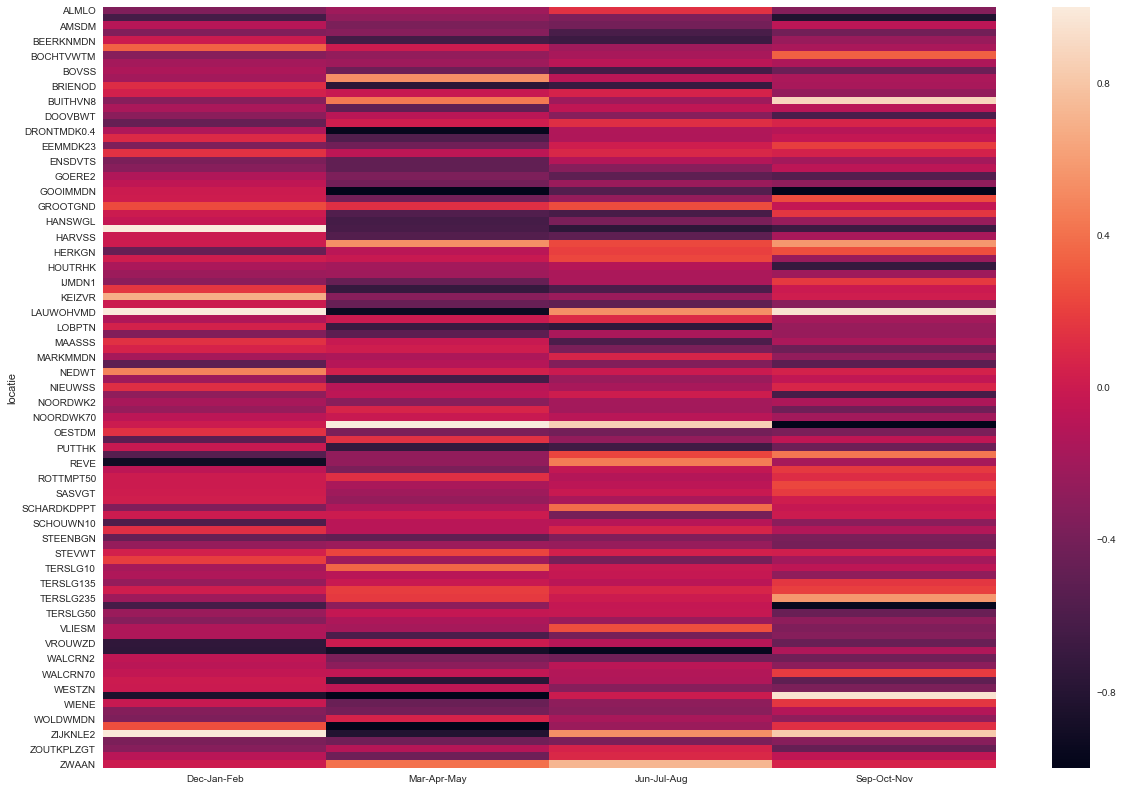

In [25]:
sns.set()

f, ax = plt.subplots(figsize=(20, 14))
sns.heatmap(seizoenen_fosfaat, annot=False, fmt="f", linewidths=0, ax=ax)

## Voor alle drie de stoffen zien we op sommige plaatsen inderdaad een grotere correlatie in bepaalde seizoenen dan over de hele periode. Orthofosfaat, bijvoorbeeld,, blijkt in de winter veel sterker (negatief) te correleren dan in andere seizoenen